In [75]:
import awkward as ak
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep as hep
import numpy as np
import pandas as pd
from coffea.util import load
import hist
import os
from pprint import pprint 
hep.style.use(hep.style.ROOT)
import vector
vector.register_awkward()
import matplotlib as mpl
mpl.rcParams["figure.figsize"]=(6, 6)
mpl.rcParams["figure.dpi"] = 80
import hist
import numba
from plotting_utils import *

In [173]:
df = load("ttbar_genmatching_v2.coffea")
dfD = df["DeepSC"]
dfM = df["Mustache"]

for key, v in dfD.items():
    dfD[key] = dfD[key].value
    
for key, v in dfM.items():
    dfM[key] = dfM[key].value

In [3]:
dfD.keys()

dict_keys(['N_genmatched_sc', 'N_genmatched_ele', 'N_nongenmatched_sc', 'N_nongenmatched_ele', 'obsPU_matched_sc', 'runId_matched_sc', 'truePU_matched_sc', 'nVtx_matched_sc', 'eventId_matched_sc', 'obsPU_matched_ele', 'runId_matched_ele', 'truePU_matched_ele', 'nVtx_matched_ele', 'eventId_matched_ele', 'obsPU_notmatched_sc', 'runId_notmatched_sc', 'truePU_notmatched_sc', 'nVtx_notmatched_sc', 'eventId_notmatched_sc', 'obsPU_notmatched_ele', 'runId_notmatched_ele', 'truePU_notmatched_ele', 'nVtx_notmatched_ele', 'eventId_notmatched_ele', 'genParticle_eta_matched_sc', 'genParticle_eta_matched_ele', 'genParticle_eta_notmatched_sc', 'genParticle_eta_notmatched_ele', 'genParticle_phi_matched_sc', 'genParticle_phi_matched_ele', 'genParticle_phi_notmatched_sc', 'genParticle_phi_notmatched_ele', 'genParticle_pt_matched_sc', 'genParticle_pt_matched_ele', 'genParticle_pt_notmatched_sc', 'genParticle_pt_notmatched_ele', 'genParticle_pdgId_matched_sc', 'genParticle_pdgId_matched_ele', 'genParticle

# GenParticles matched to SuperClusters

Text(0.1, 0.8, 'Not matched to SC')

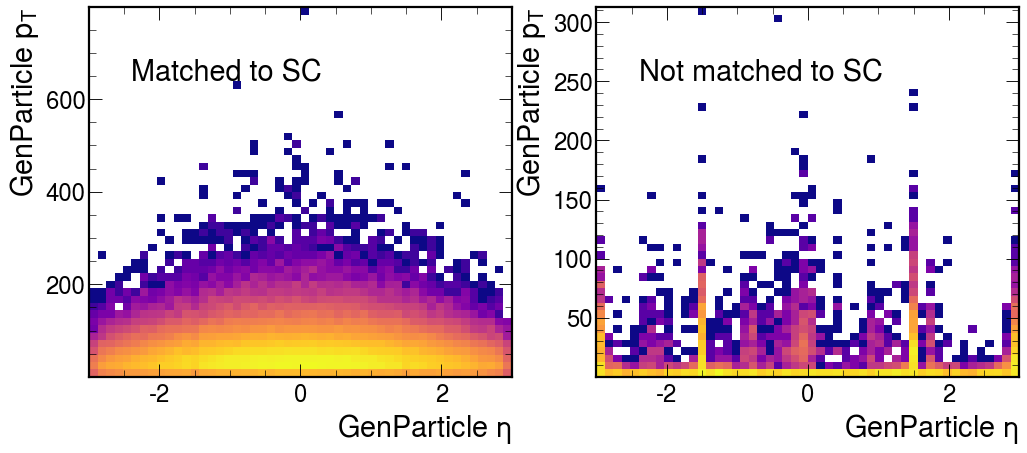

In [7]:
fig, (ax,bx) = plt.subplots(1,2 , figsize=(15,6))
mask = abs(dfD["genParticle_eta_matched_sc"])< 3


ax.hist2d(
    dfD["genParticle_eta_matched_sc"][mask], 
    dfD["genParticle_pt_matched_sc"][mask], 
    bins=50, 
norm=LogNorm(), cmap="plasma");
ax.set_xlabel("GenParticle $\eta$")
ax.set_ylabel("GenParticle $p_T$")

ax.text(0.1, 0.8, "Matched to SC", transform=ax.transAxes)

mask = abs(dfD["genParticle_eta_notmatched_sc"])< 3

bx.hist2d(
    dfD["genParticle_eta_notmatched_sc"][mask], 
    dfD["genParticle_pt_notmatched_sc"][mask], 
    bins=50, 
norm=LogNorm(), cmap="plasma");
bx.set_xlabel("GenParticle $\eta$")
bx.set_ylabel("GenParticle $p_T$")

bx.text(0.1, 0.8, "Not matched to SC",transform=bx.transAxes)

B: 194199.0
A. 188172.0


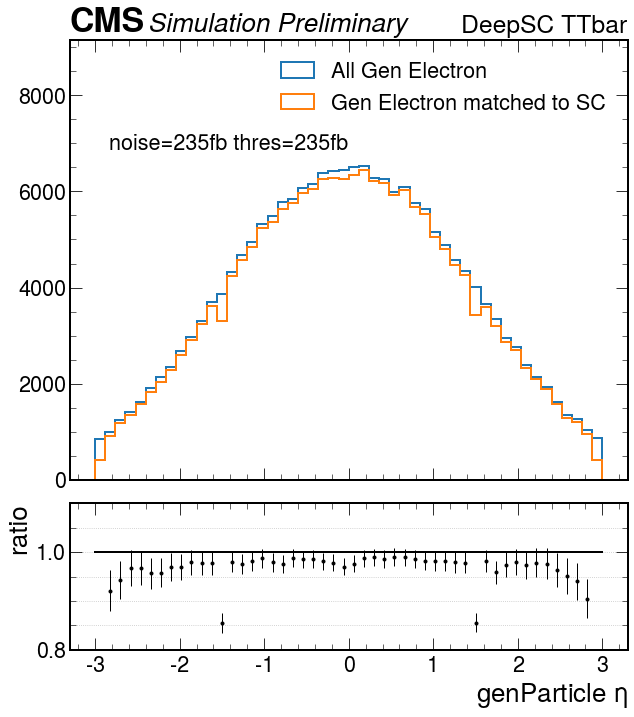

In [8]:
plot_comparison(
                np.concatenate([dfD["genParticle_eta_notmatched_sc"], dfD["genParticle_eta_matched_sc"]]),
                dfD["genParticle_eta_matched_sc"], 
                "genParticle_eta", 
                "genParticle $\eta$", 
                bins=50, xrange=(-3,3), 
                ratio_lim=(0.80, 1.1),
                legendB="All Gen Electron", 
                legendA="Gen Electron matched to SC",
                rlabel="DeepSC TTbar",
                text="noise=235fb thres=235fb",
               output_folder="ttbar_plots")

B: 194058.0
A. 188040.0


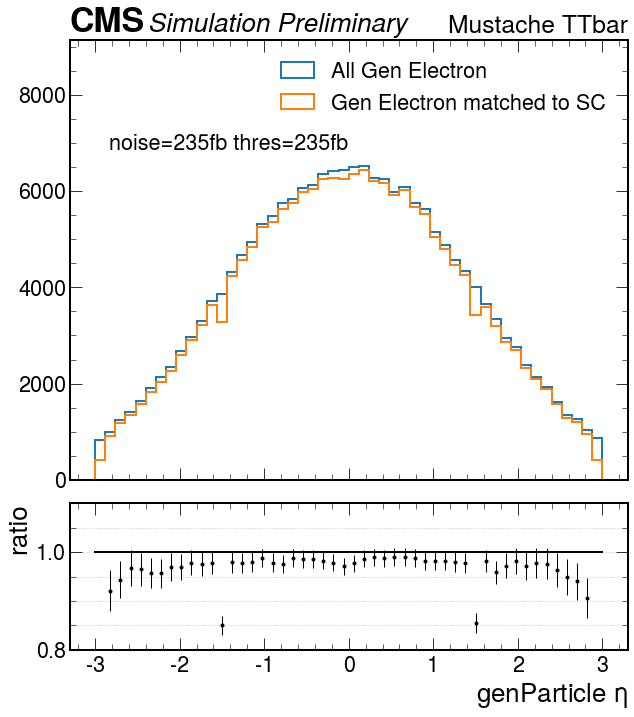

In [9]:
plot_comparison(
                np.concatenate([dfM["genParticle_eta_notmatched_sc"], dfM["genParticle_eta_matched_sc"]]),
                dfM["genParticle_eta_matched_sc"], 
                "genParticle_eta", 
                "genParticle $\eta$", 
                bins=50, xrange=(-3,3), 
                ratio_lim=(0.8, 1.1),
                legendB="All Gen Electron", 
                legendA="Gen Electron matched to SC",
                rlabel="Mustache TTbar",
                text="noise=235fb thres=235fb",
               output_folder="ttbar_plots")

# Matching efficiency study

In [10]:
def efficiency_sc(df, range=((-3,3),(0, 300)), bins=(30, 30)):
    N_matched_sc, xbins, ybins = np.histogram2d(df["genParticle_eta_matched_sc"], df["genParticle_pt_matched_sc"], 
               range=range, bins=bins )

    N_notmatched_sc, xbins, ybins = np.histogram2d(df["genParticle_eta_notmatched_sc"], df["genParticle_pt_notmatched_sc"], 
                range=range, bins=bins )

    N_matched_total_sc = N_matched_sc + N_notmatched_sc
    eff_sc = np.where(N_matched_total_sc>0, N_matched_sc / N_matched_total_sc, 1.)
    return eff_sc, xbins, ybins

/tmp/ipykernel_22322/214140238.py:9: RuntimeWarning: invalid value encountered in divide
  eff_sc = np.where(N_matched_total_sc>0, N_matched_sc / N_matched_total_sc, 1.)


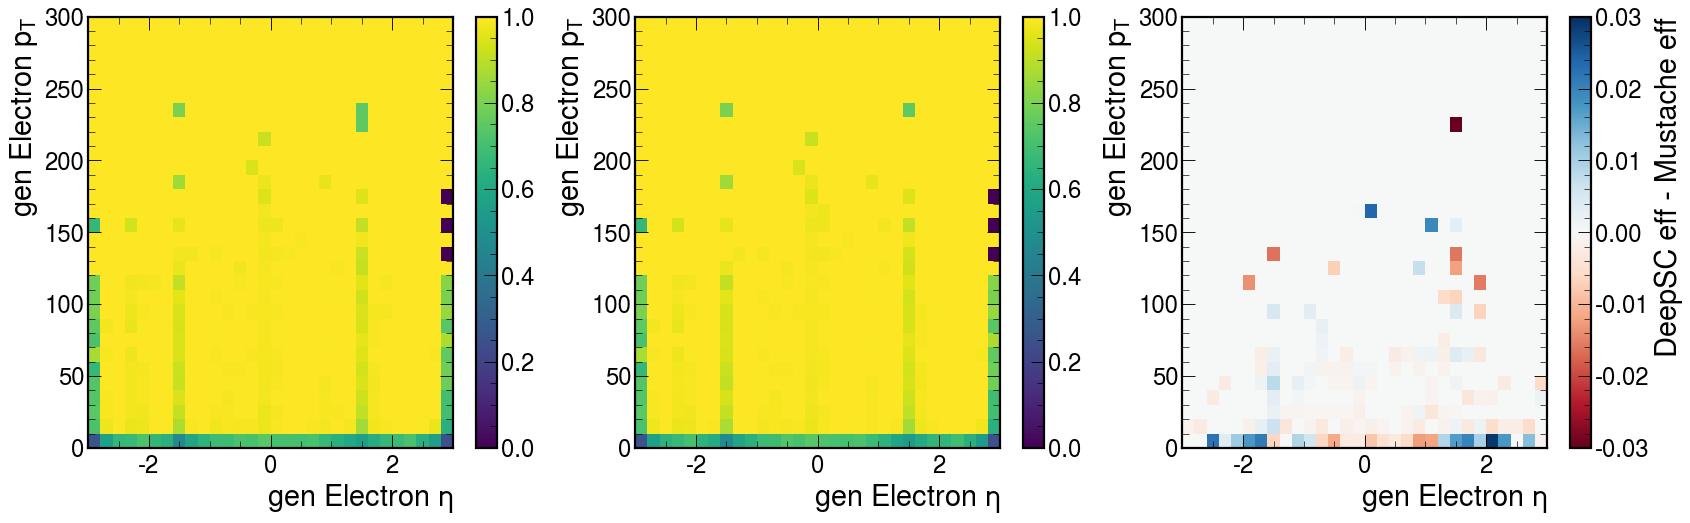

In [11]:
fig, (ax,bx, cx) = plt.subplots(1,3, figsize=(25,7))

eff_deepsc,Xedges, Yedges = efficiency_sc(dfD)
eff_mustache,Xedges, Yedges = efficiency_sc(dfM)


X, Y = np.meshgrid(Xedges, Yedges)
ax.set_xlabel("gen Electron $\eta$")
ax.set_ylabel("gen Electron $p_T$") 

I = ax.pcolormesh(X, Y, eff_deepsc.T)
plt.colorbar(I, ax=ax)
bx.set_xlabel("gen Electron $\eta$")
bx.set_ylabel("gen Electron $p_T$") 

I = bx.pcolormesh(X, Y, eff_mustache.T)
plt.colorbar(I, ax=bx)
cx.set_xlabel("gen Electron $\eta$")
cx.set_ylabel("gen Electron $p_T$") 

I = cx.pcolormesh(X, Y, eff_deepsc.T- eff_mustache.T, vmax=0.03, vmin=-0.03, 
                 cmap="RdBu")
plt.colorbar(I, ax=cx, label="DeepSC eff - Mustache eff" )

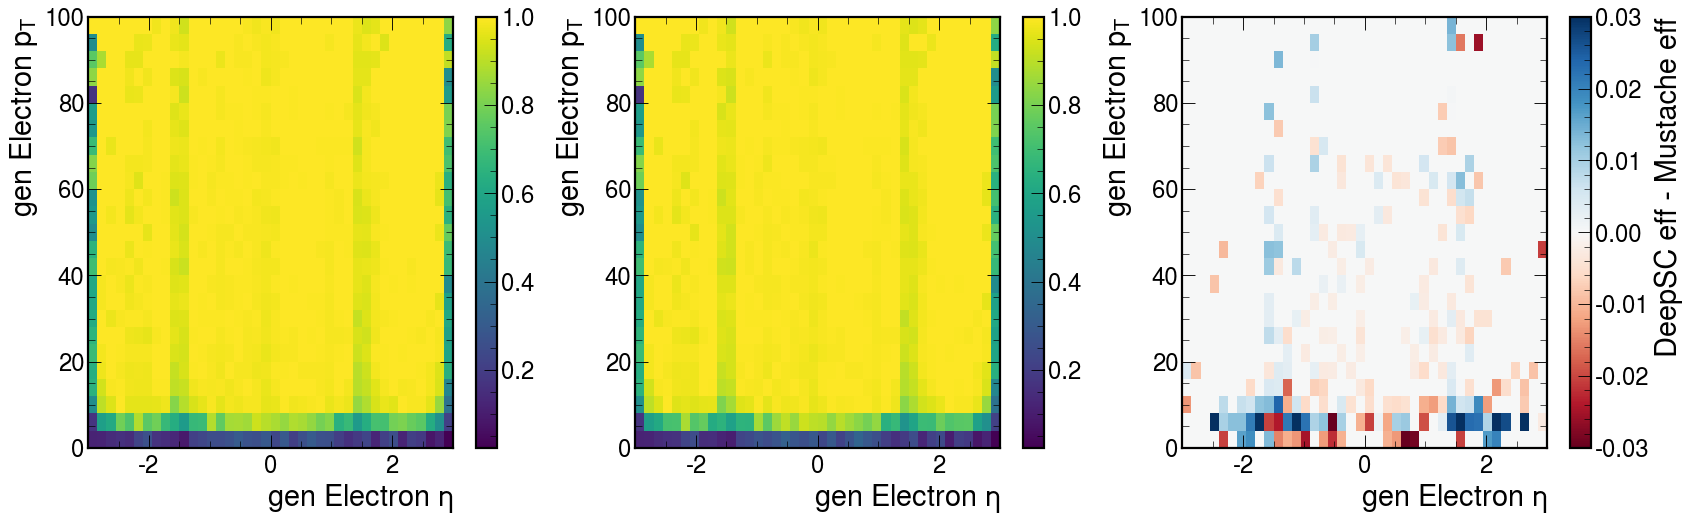

In [12]:
fig, (ax,bx, cx) = plt.subplots(1,3, figsize=(25,7))

eff_deepsc,Xedges, Yedges = efficiency_sc(dfD, range=((-3,3),(0, 100)), bins=(40, 25))
eff_mustache,Xedges, Yedges = efficiency_sc(dfM,range=((-3,3),(0, 100)), bins=(40, 25))

X, Y = np.meshgrid(Xedges, Yedges)
ax.set_xlabel("gen Electron $\eta$")
ax.set_ylabel("gen Electron $p_T$") 

I = ax.pcolormesh(X, Y, eff_deepsc.T)
plt.colorbar(I, ax=ax)
bx.set_xlabel("gen Electron $\eta$")
bx.set_ylabel("gen Electron $p_T$") 

I = bx.pcolormesh(X, Y, eff_mustache.T)
plt.colorbar(I, ax=bx)
cx.set_xlabel("gen Electron $\eta$")
cx.set_ylabel("gen Electron $p_T$") 

I = cx.pcolormesh(X, Y, eff_deepsc.T- eff_mustache.T, vmax=0.03, vmin=-0.03, 
                 cmap="RdBu")
plt.colorbar(I, ax=cx, label="DeepSC eff - Mustache eff" )

# GenParticle Mustache-DeepSC matching 

In [160]:
def get_data_sc(df):
    matched = {
        "is_matched_sc": np.ones(df["eventId_matched_sc"].shape),
        "runId" : df["runId_matched_sc"],
        "eventId" : df["eventId_matched_sc"],
        "genpart_idx" : df["genParticle_index_matched_sc"],
        "seed_idx": df["superCluster_seedRawId"],
        "genPart_pt": df["genParticle_pt_matched_sc"],
        "genPart_eta": df["genParticle_eta_matched_sc"],
        "genPart_phi": df["genParticle_phi_matched_sc"],
        "sc_pt": df["superCluster_energy"] / np.cosh(df["superCluster_eta"]),
        "sc_energy": df["superCluster_energy"],
        "sc_rawenergy": df["superCluster_rawEnergy"],
        "sc_eta": df["superCluster_eta"],
        "sc_ncls": df["superCluster_nPFClusters"],
        
    }

    notmatched = {
        "is_matched_sc": np.zeros(df["eventId_notmatched_sc"].shape),
        "runId" : df["runId_notmatched_sc"],
        "eventId" : df["eventId_notmatched_sc"],
        "genpart_idx" : df["genParticle_index_notmatched_sc"],
        "seed_idx": -1*np.ones(df["runId_notmatched_sc"].shape),
        "genPart_pt": df["genParticle_pt_notmatched_sc"],
        "genPart_eta": df["genParticle_eta_notmatched_sc"],
        "genPart_phi": df["genParticle_phi_notmatched_sc"],
        "sc_pt": -1*np.ones(df["runId_notmatched_sc"].shape),
        "sc_energy": -1*np.ones(df["runId_notmatched_sc"].shape),
        "sc_rawenergy": -1*np.ones(df["runId_notmatched_sc"].shape),
        "sc_eta": -1*np.ones(df["runId_notmatched_sc"].shape),
        "sc_ncls": -1*np.ones(df["runId_notmatched_sc"].shape),
    }
    
    return pd.concat([pd.DataFrame(matched), pd.DataFrame(notmatched)])

pD = get_data_sc(dfD)
pM = get_data_sc(dfM)

In [161]:
df_join = pM.merge(pD, on=["runId","eventId","genpart_idx"], suffixes=["_M", "_D"],indicator=True, how="inner", sort=False)

In [36]:
df_join

,is_matched_sc_M,runId,eventId,genpart_idx,seed_idx_M,genPart_pt_M,genPart_eta_M,genPart_phi_M,sc_pt_M,sc_energy_M,...,seed_idx_D,genPart_pt_D,genPart_eta_D,genPart_phi_D,sc_pt_D,sc_energy_D,sc_rawenergy_D,sc_eta_D,sc_ncls_D,_merge
0,1.0,100011101.0,1.0,0,838953516.0,99.548500,0.896864,0.585721,99.157562,143.263519,...,838953516.0,99.548500,0.896864,0.585721,99.357147,143.551880,138.884872,0.911328,1.0,both
1,1.0,100011101.0,5.0,0,872443689.0,10.120612,1.605322,-0.146736,11.899733,31.557514,...,872443689.0,10.120612,1.605322,-0.146736,11.101725,28.978537,18.609665,1.613709,2.0,both
2,1.0,100011101.0,3.0,0,838869830.0,26.240738,-0.267493,-0.747718,25.890715,26.995966,...,838869830.0,26.240738,-0.267493,-0.747718,25.782793,26.883436,24.628056,-0.291166,1.0,both
3,1.0,100011101.0,11.0,0,872437534.0,16.457993,2.362278,-1.743536,16.682617,89.753006,...,872437534.0,16.457993,2.362278,-1.743536,16.224190,87.286652,68.976425,2.367090,1.0,both
4,1.0,100011101.0,7.0,0,872437599.0,66.994949,1.614545,1.656981,71.842323,188.676941,...,872437599.0,66.994949,1.614545,1.656981,71.634895,188.132172,171.529327,1.620317,1.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201983,0.0,100001.0,72.0,0,-1.0,46.927258,3.040477,0.360343,-1.000000,-1.000000,...,-1.0,46.927258,3.040477,0.360343,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,both
201984,0.0,100001.0,93.0,0,-1.0,41.964752,-3.092058,-2.113518,-1.000000,-1.000000,...,-1.0,41.964752,-3.092058,-2.113518,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,both
201985,0.0,100001.0,103.0,0,-1.0,3.699879,2.676617,-1.411888,-1.000000,-1.000000,...,-1.0,3.699879,2.676617,-1.411888,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,both
201986,0.0,100001.0,117.0,0,-1.0,40.018574,2.984263,-2.642252,-1.000000,-1.000000,...,-1.0,40.018574,2.984263,-2.642252,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,both


In [37]:
np.sum((df_join.is_matched_sc_M !=1) & (df_join.is_matched_sc_D!=1))

13731

In [32]:
np.sum((df_join.is_matched_sc_M ==1) & (df_join.is_matched_sc_D==1))

187823

In [38]:
both_not_matched = (df_join.is_matched_sc_M !=1) & (df_join.is_matched_sc_D!=1)

In [39]:
df_join[both_not_matched]

,is_matched_sc_M,runId,eventId,genpart_idx,seed_idx_M,genPart_pt_M,genPart_eta_M,genPart_phi_M,sc_pt_M,sc_energy_M,...,seed_idx_D,genPart_pt_D,genPart_eta_D,genPart_phi_D,sc_pt_D,sc_energy_D,sc_rawenergy_D,sc_eta_D,sc_ncls_D,_merge
188043,0.0,100011101.0,103.0,0,-1.0,4.133733,-3.713780,0.644157,-1.0,-1.0,...,-1.0,4.133733,-3.713780,0.644157,-1.0,-1.0,-1.0,-1.0,-1.0,both
188044,0.0,100011101.0,136.0,0,-1.0,5.658061,3.777300,-2.384964,-1.0,-1.0,...,-1.0,5.658061,3.777300,-2.384964,-1.0,-1.0,-1.0,-1.0,-1.0,both
188045,0.0,100011101.0,147.0,0,-1.0,15.541051,-3.255044,-2.484351,-1.0,-1.0,...,-1.0,15.541051,-3.255044,-2.484351,-1.0,-1.0,-1.0,-1.0,-1.0,both
188046,0.0,100011101.0,161.0,0,-1.0,0.738103,4.134089,0.479446,-1.0,-1.0,...,-1.0,0.738103,4.134089,0.479446,-1.0,-1.0,-1.0,-1.0,-1.0,both
188047,0.0,100011101.0,189.0,1,-1.0,80.600861,2.998478,0.269151,-1.0,-1.0,...,-1.0,80.600861,2.998478,0.269151,-1.0,-1.0,-1.0,-1.0,-1.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201983,0.0,100001.0,72.0,0,-1.0,46.927258,3.040477,0.360343,-1.0,-1.0,...,-1.0,46.927258,3.040477,0.360343,-1.0,-1.0,-1.0,-1.0,-1.0,both
201984,0.0,100001.0,93.0,0,-1.0,41.964752,-3.092058,-2.113518,-1.0,-1.0,...,-1.0,41.964752,-3.092058,-2.113518,-1.0,-1.0,-1.0,-1.0,-1.0,both
201985,0.0,100001.0,103.0,0,-1.0,3.699879,2.676617,-1.411888,-1.0,-1.0,...,-1.0,3.699879,2.676617,-1.411888,-1.0,-1.0,-1.0,-1.0,-1.0,both
201986,0.0,100001.0,117.0,0,-1.0,40.018574,2.984263,-2.642252,-1.0,-1.0,...,-1.0,40.018574,2.984263,-2.642252,-1.0,-1.0,-1.0,-1.0,-1.0,both


Text(0, 1, 'Matched SC - DeepSC')

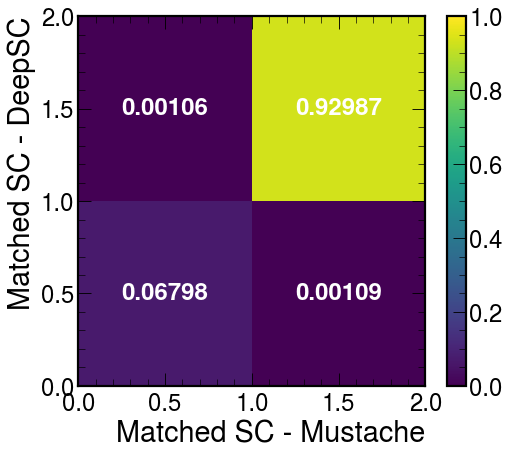

In [64]:
fig = plt.figure(figsize=(7,6))
ax = plt.gca()

hist, xbins, ybins = np.histogram2d(df_join.is_matched_sc_M, df_join.is_matched_sc_D,
                                     range=((0,2),(0,2)), bins=(2,2), density=True)

X, Y = np.meshgrid(xbins, ybins)
ax.pcolormesh(X,Y, hist.T, vmax=1, vmin=0)

for i in range(2):
    for j in range(2):
        ax.text(xbins[j]+0.5,ybins[i]+0.5, "{:.5f}".format(hist.T[i,j]), 
                color="w", ha="center", va="center", fontweight="bold", fontsize="small")

fig.colorbar(C,ax=ax)
ax.set_xlabel("Matched SC - Mustache")
ax.set_ylabel("Matched SC - DeepSC")

In [65]:
df_join

,is_matched_sc_M,runId,eventId,genpart_idx,seed_idx_M,genPart_pt_M,genPart_eta_M,genPart_phi_M,sc_pt_M,sc_energy_M,...,seed_idx_D,genPart_pt_D,genPart_eta_D,genPart_phi_D,sc_pt_D,sc_energy_D,sc_rawenergy_D,sc_eta_D,sc_ncls_D,_merge
0,1.0,100011101.0,1.0,0,838953516.0,99.548500,0.896864,0.585721,99.157562,143.263519,...,838953516.0,99.548500,0.896864,0.585721,99.357147,143.551880,138.884872,0.911328,1.0,both
1,1.0,100011101.0,5.0,0,872443689.0,10.120612,1.605322,-0.146736,11.899733,31.557514,...,872443689.0,10.120612,1.605322,-0.146736,11.101725,28.978537,18.609665,1.613709,2.0,both
2,1.0,100011101.0,3.0,0,838869830.0,26.240738,-0.267493,-0.747718,25.890715,26.995966,...,838869830.0,26.240738,-0.267493,-0.747718,25.782793,26.883436,24.628056,-0.291166,1.0,both
3,1.0,100011101.0,11.0,0,872437534.0,16.457993,2.362278,-1.743536,16.682617,89.753006,...,872437534.0,16.457993,2.362278,-1.743536,16.224190,87.286652,68.976425,2.367090,1.0,both
4,1.0,100011101.0,7.0,0,872437599.0,66.994949,1.614545,1.656981,71.842323,188.676941,...,872437599.0,66.994949,1.614545,1.656981,71.634895,188.132172,171.529327,1.620317,1.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201983,0.0,100001.0,72.0,0,-1.0,46.927258,3.040477,0.360343,-1.000000,-1.000000,...,-1.0,46.927258,3.040477,0.360343,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,both
201984,0.0,100001.0,93.0,0,-1.0,41.964752,-3.092058,-2.113518,-1.000000,-1.000000,...,-1.0,41.964752,-3.092058,-2.113518,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,both
201985,0.0,100001.0,103.0,0,-1.0,3.699879,2.676617,-1.411888,-1.000000,-1.000000,...,-1.0,3.699879,2.676617,-1.411888,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,both
201986,0.0,100001.0,117.0,0,-1.0,40.018574,2.984263,-2.642252,-1.000000,-1.000000,...,-1.0,40.018574,2.984263,-2.642252,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,both


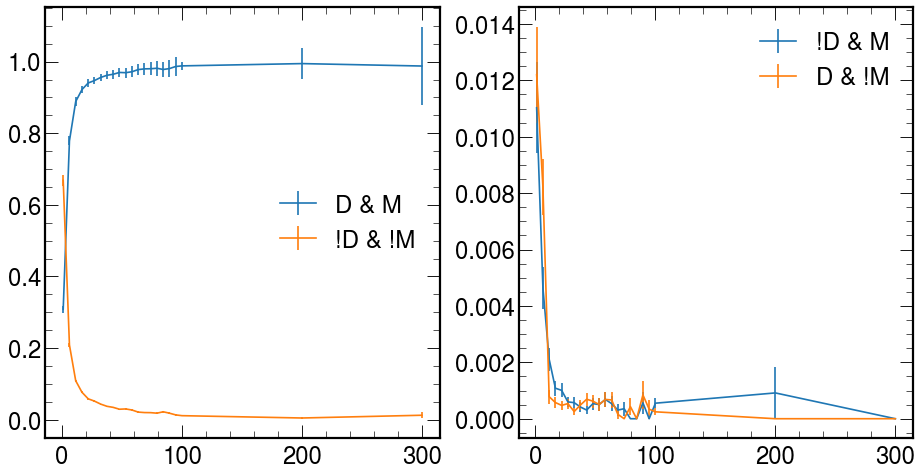

In [123]:
bins = np.concatenate([np.linspace(1, 100, 20), [200,300, 500]])

N_matched_both_pt, _ = np.histogram(df_join["genPart_pt_D"][(df_join.is_matched_sc_D==1)&(df_join.is_matched_sc_M==1)], 
               bins=bins )

N_matched_Donly_pt, _ = np.histogram(df_join["genPart_pt_D"][(df_join.is_matched_sc_D==1)&(df_join.is_matched_sc_M==0)], 
             bins=bins )

N_matched_Monly_pt, _= np.histogram(df_join["genPart_pt_M"][(df_join.is_matched_sc_D==0)&(df_join.is_matched_sc_M==1)], 
              bins=bins )

N_notmatched_pt, xbins = np.histogram(df_join["genPart_pt_D"][(df_join.is_matched_sc_D==0)&(df_join.is_matched_sc_M==0)], 
              bins=bins )

N_tot = N_matched_both_pt + N_matched_Donly_pt + N_matched_Monly_pt + N_notmatched_pt

fig, (ax,bx) = plt.subplots(1,2, figsize=(14,7))

err_both =  np.sqrt(  (1/N_tot)**2 * N_matched_both_pt + (N_matched_both_pt/N_tot**2)**2*N_tot)
err_notmatched =  np.sqrt(  (1/N_tot)**2 * N_notmatched_pt + (N_notmatched_pt/N_tot**2)**2*N_tot)
err_Donly =  np.sqrt(  (1/N_tot)**2 * N_matched_Donly_pt + (N_matched_Donly_pt/N_tot**2)**2*N_tot)
err_Monly =  np.sqrt(  (1/N_tot)**2 * N_matched_Monly_pt + (N_matched_Monly_pt/N_tot**2)**2*N_tot)

ax.errorbar(xbins[:-1], N_matched_both_pt/N_tot, err_both, label="D & M")
ax.errorbar(xbins[:-1], N_notmatched_pt/N_tot, err_notmatched, label="!D & !M")
bx.errorbar(xbins[:-1], N_matched_Monly_pt/N_tot,err_Monly, label="!D & M")
bx.errorbar(xbins[:-1], N_matched_Donly_pt/N_tot,err_Donly, label="D & !M")

ax.legend()
bx.legend()

### 2D analysis

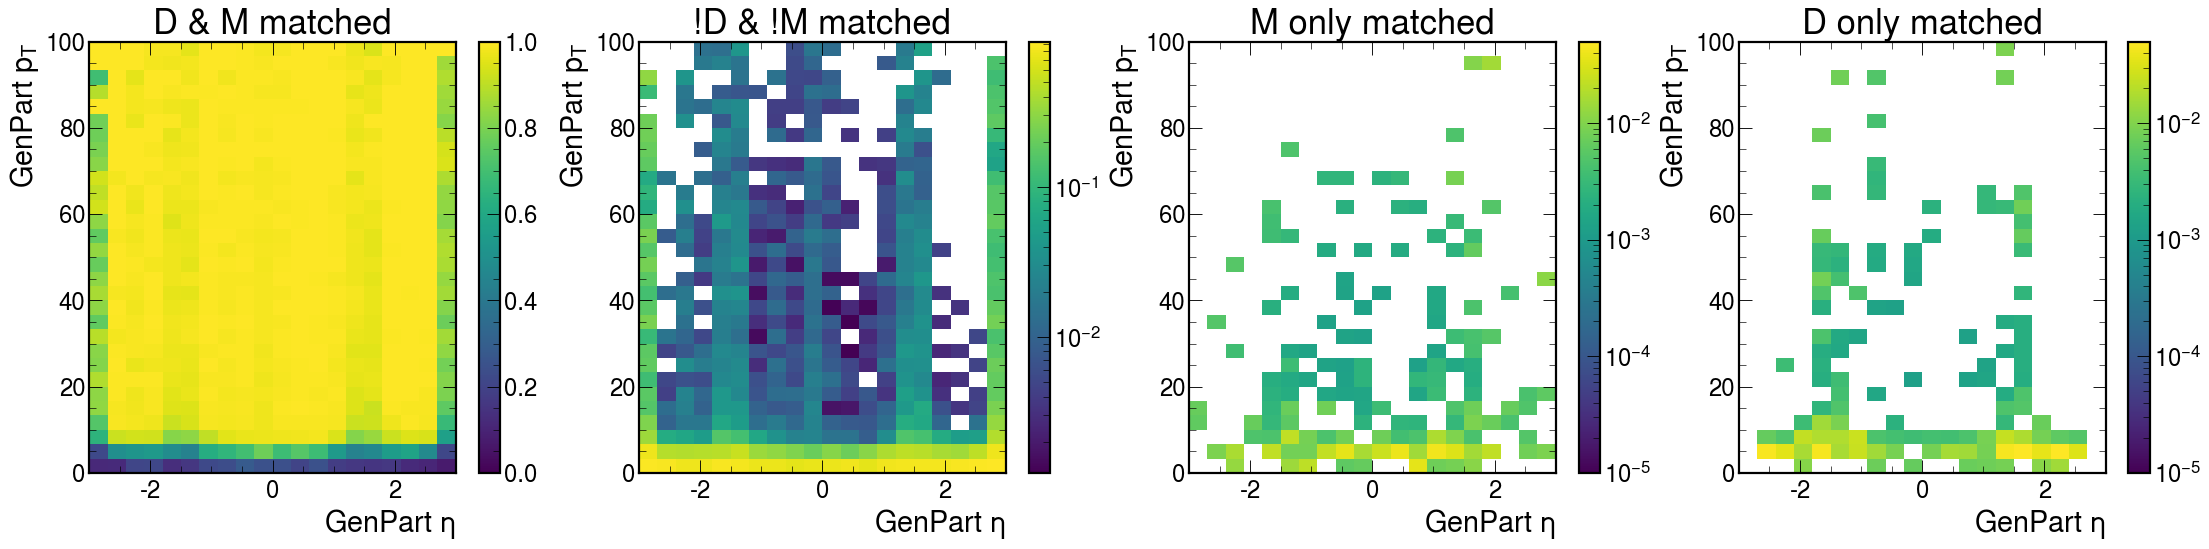

In [142]:
bins = (20, 30)
rrange = ((-3,3),(0,100))

N_matched_both_pteta, _, _ = np.histogram2d(df_join["genPart_eta_D"][(df_join.is_matched_sc_D==1)&(df_join.is_matched_sc_M==1)],
                                            df_join["genPart_pt_D"][(df_join.is_matched_sc_D==1)&(df_join.is_matched_sc_M==1)],
               bins=bins, range=rrange )

N_matched_Donly_pteta, _, _ = np.histogram2d(df_join["genPart_eta_D"][(df_join.is_matched_sc_D==1)&(df_join.is_matched_sc_M==0)],
                                             df_join["genPart_pt_D"][(df_join.is_matched_sc_D==1)&(df_join.is_matched_sc_M==0)],
            bins=bins, range=rrange  )

N_matched_Monly_pteta, _, _= np.histogram2d(df_join["genPart_eta_M"][(df_join.is_matched_sc_D==0)&(df_join.is_matched_sc_M==1)], 
                                            df_join["genPart_pt_M"][(df_join.is_matched_sc_D==0)&(df_join.is_matched_sc_M==1)], 
            bins=bins, range=rrange )

N_notmatched_pteta, xbins, ybins = np.histogram2d(df_join["genPart_eta_D"][(df_join.is_matched_sc_D==0)&(df_join.is_matched_sc_M==0)], 
                                                  df_join["genPart_pt_D"][(df_join.is_matched_sc_D==0)&(df_join.is_matched_sc_M==0)], 
             bins=bins, range=rrange )

N_tot = N_matched_both_pteta + N_matched_Donly_pteta + N_matched_Monly_pteta + N_notmatched_pteta


fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(34,7))

X, Y = np.meshgrid(xbins, ybins)


c1 = ax1.pcolormesh(X,Y, (N_matched_both_pteta/N_tot).T, vmax=1, vmin=0)
c2 = ax2.pcolormesh(X,Y, (N_notmatched_pteta/N_tot).T,  norm=LogNorm())
c3 = ax3.pcolormesh(X,Y, (N_matched_Monly_pteta/N_tot).T,  norm=LogNorm(vmax=0.05, vmin=1e-5,))
c4 = ax4.pcolormesh(X,Y, (N_matched_Donly_pteta/N_tot).T, norm=LogNorm( vmax=0.05, vmin=1e-5,))

ax1.set_xlabel("GenPart $\eta$")
ax2.set_xlabel("GenPart $\eta$")
ax3.set_xlabel("GenPart $\eta$")
ax4.set_xlabel("GenPart $\eta$")
ax1.set_ylabel("GenPart $p_T$")
ax2.set_ylabel("GenPart $p_T$")
ax3.set_ylabel("GenPart $p_T$")
ax4.set_ylabel("GenPart $p_T$")

ax1.set_title("D & M matched")
ax2.set_title("!D & !M matched")
ax3.set_title("M only matched")
ax4.set_title("D only matched")
plt.colorbar(c1, ax=ax1)
plt.colorbar(c2, ax=ax2)
plt.colorbar(c3, ax=ax3)
plt.colorbar(c4, ax=ax4)

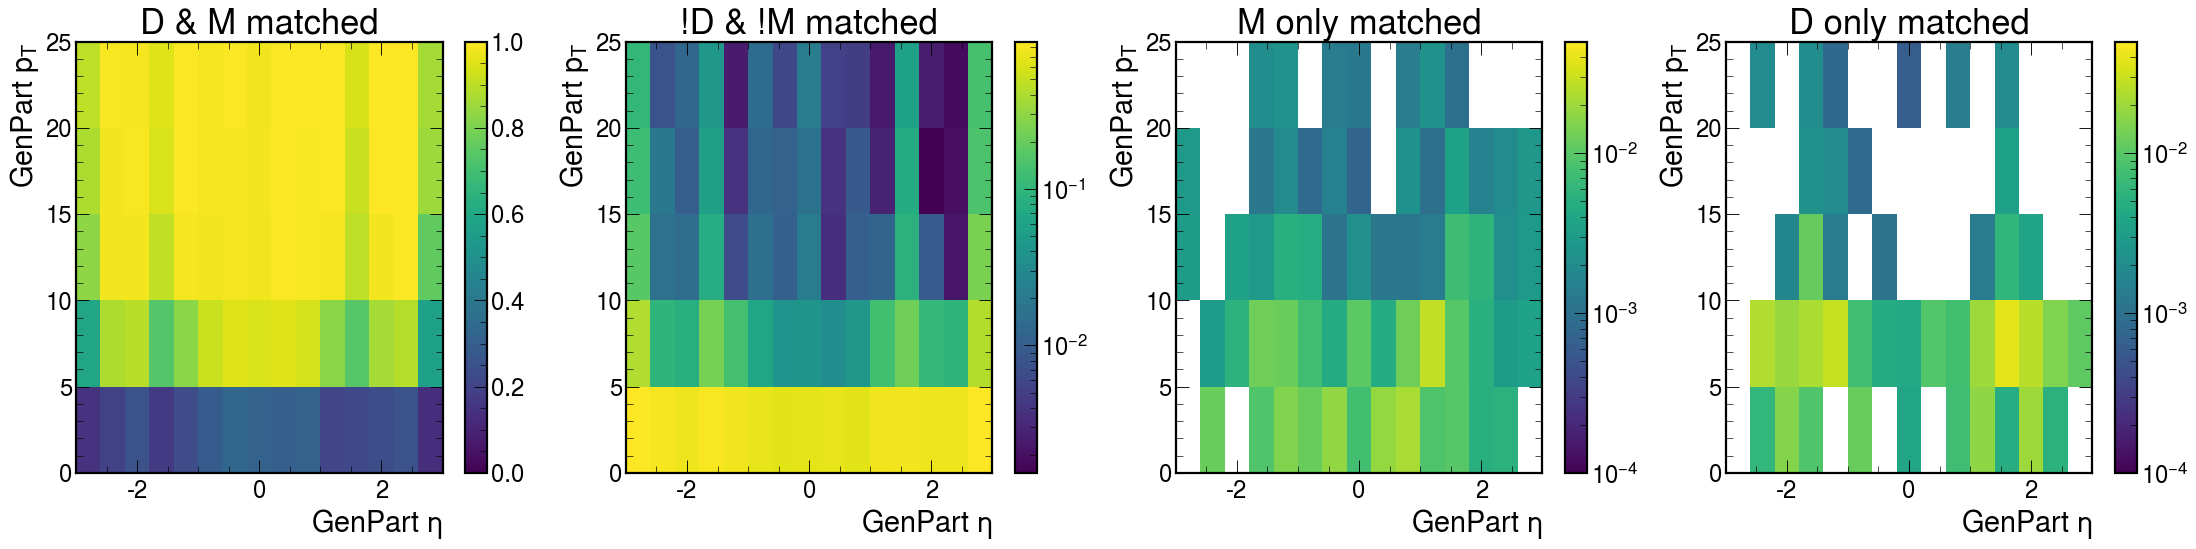

In [152]:
bins = (15, 5)
rrange = ((-3,3),(0,25))

N_matched_both_pteta, _, _ = np.histogram2d(df_join["genPart_eta_D"][(df_join.is_matched_sc_D==1)&(df_join.is_matched_sc_M==1)],
                                            df_join["genPart_pt_D"][(df_join.is_matched_sc_D==1)&(df_join.is_matched_sc_M==1)],
               bins=bins, range=rrange )

N_matched_Donly_pteta, _, _ = np.histogram2d(df_join["genPart_eta_D"][(df_join.is_matched_sc_D==1)&(df_join.is_matched_sc_M==0)],
                                             df_join["genPart_pt_D"][(df_join.is_matched_sc_D==1)&(df_join.is_matched_sc_M==0)],
            bins=bins, range=rrange  )

N_matched_Monly_pteta, _, _= np.histogram2d(df_join["genPart_eta_M"][(df_join.is_matched_sc_D==0)&(df_join.is_matched_sc_M==1)], 
                                            df_join["genPart_pt_M"][(df_join.is_matched_sc_D==0)&(df_join.is_matched_sc_M==1)], 
            bins=bins, range=rrange )

N_notmatched_pteta, xbins, ybins = np.histogram2d(df_join["genPart_eta_D"][(df_join.is_matched_sc_D==0)&(df_join.is_matched_sc_M==0)], 
                                                  df_join["genPart_pt_D"][(df_join.is_matched_sc_D==0)&(df_join.is_matched_sc_M==0)], 
             bins=bins, range=rrange )

N_tot = N_matched_both_pteta + N_matched_Donly_pteta + N_matched_Monly_pteta + N_notmatched_pteta


fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(34,7))

X, Y = np.meshgrid(xbins, ybins)


c1 = ax1.pcolormesh(X,Y, (N_matched_both_pteta/N_tot).T, vmax=1, vmin=0)
c2 = ax2.pcolormesh(X,Y, (N_notmatched_pteta/N_tot).T,  norm=LogNorm())
c3 = ax3.pcolormesh(X,Y, (N_matched_Monly_pteta/N_tot).T,  norm=LogNorm(vmax=0.05, vmin=1e-4,))
c4 = ax4.pcolormesh(X,Y, (N_matched_Donly_pteta/N_tot).T, norm=LogNorm( vmax=0.05, vmin=1e-4,))

ax1.set_xlabel("GenPart $\eta$")
ax2.set_xlabel("GenPart $\eta$")
ax3.set_xlabel("GenPart $\eta$")
ax4.set_xlabel("GenPart $\eta$")
ax1.set_ylabel("GenPart $p_T$")
ax2.set_ylabel("GenPart $p_T$")
ax3.set_ylabel("GenPart $p_T$")
ax4.set_ylabel("GenPart $p_T$")

ax1.set_title("D & M matched")
ax2.set_title("!D & !M matched")
ax3.set_title("M only matched")
ax4.set_title("D only matched")
plt.colorbar(c1, ax=ax1)
plt.colorbar(c2, ax=ax2)
plt.colorbar(c3, ax=ax3)
plt.colorbar(c4, ax=ax4)

# GenParticle Electron matching

In [182]:
def efficiency_ele(df, range=((-3,3),(0, 300)), bins=(30, 30)):
    N_matched_sc, xbins, ybins = np.histogram2d(df["genParticle_eta_matched_ele"], 
                                                df["genParticle_pt_matched_ele"], 
                                           range=range, bins=bins )

    N_notmatched_sc, xbins, ybins = np.histogram2d(df["genParticle_eta_notmatched_ele"],                 
                                                   df["genParticle_pt_notmatched_ele"], 
                                                    range=range, bins=bins )

    N_matched_total_sc = N_matched_sc + N_notmatched_sc
    eff_sc = np.where(N_matched_total_sc>0, N_matched_sc / N_matched_total_sc, 1.)
    return eff_sc, xbins, ybins

/tmp/ipykernel_24813/2849115534.py:11: RuntimeWarning: invalid value encountered in divide
  eff_sc = np.where(N_matched_total_sc>0, N_matched_sc / N_matched_total_sc, 1.)


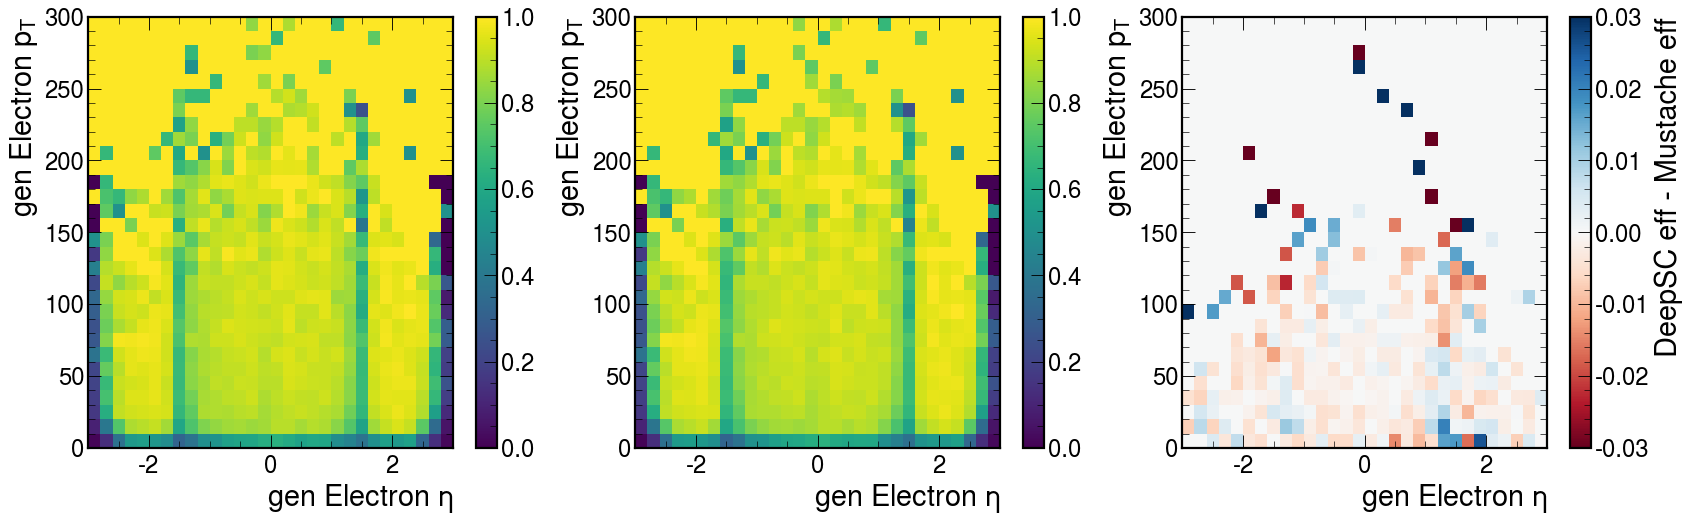

In [183]:
fig, (ax,bx, cx) = plt.subplots(1,3, figsize=(25,7))

eff_deepsc,Xedges, Yedges = efficiency_ele(dfD)
eff_mustache,Xedges, Yedges = efficiency_ele(dfM)


X, Y = np.meshgrid(Xedges, Yedges)
ax.set_xlabel("gen Electron $\eta$")
ax.set_ylabel("gen Electron $p_T$") 

I = ax.pcolormesh(X, Y, eff_deepsc.T)
plt.colorbar(I, ax=ax)
bx.set_xlabel("gen Electron $\eta$")
bx.set_ylabel("gen Electron $p_T$") 

I = bx.pcolormesh(X, Y, eff_mustache.T)
plt.colorbar(I, ax=bx)
cx.set_xlabel("gen Electron $\eta$")
cx.set_ylabel("gen Electron $p_T$") 

I = cx.pcolormesh(X, Y, eff_deepsc.T- eff_mustache.T, vmax=0.03, vmin=-0.03, 
                 cmap="RdBu")
plt.colorbar(I, ax=cx, label="DeepSC eff - Mustache eff" )

In [181]:
def get_data_ele(df):
    matched = {
        "is_matched_ele": np.ones(df["eventId_matched_ele"].shape),
        "runId" : df["runId_matched_ele"],
        "eventId" : df["eventId_matched_ele"],
        "genpart_idx" : df["genParticle_index_matched_ele"],
        "genPart_pt": df["genParticle_pt_matched_ele"],
        "genPart_eta": df["genParticle_eta_matched_ele"],
        "genPart_phi": df["genParticle_phi_matched_ele"],
        "ele_pt": df["patElectron_energy"] / np.cosh(df["patElectron_eta"]),
        "ele_energy": df["patElectron_energy"],
        "ele_eta": df["patElectron_eta"],
        
    }

    notmatched = {
        "is_matched_ele": np.zeros(df["eventId_notmatched_ele"].shape),
        "runId" : df["runId_notmatched_ele"],
        "eventId" : df["eventId_notmatched_ele"],
        "genpart_idx" : df["genParticle_index_notmatched_ele"],
        "genPart_pt": df["genParticle_pt_notmatched_ele"],
        "genPart_eta": df["genParticle_eta_notmatched_ele"],
        "genPart_phi": df["genParticle_phi_notmatched_ele"],
        "ele_pt": -1*np.ones(df["runId_notmatched_ele"].shape),
        "ele_energy": -1*np.ones(df["runId_notmatched_ele"].shape),
        "ele_eta": -1*np.ones(df["runId_notmatched_ele"].shape),
    }
    
    return pd.concat([pd.DataFrame(matched), pd.DataFrame(notmatched)])

pD = get_data_ele(dfD)
pM = get_data_ele(dfM)

In [184]:
df_join = pM.merge(pD, on=["runId","eventId","genpart_idx"], suffixes=["_M", "_D"],indicator=True, how="inner", sort=False)

In [185]:
df_join

,is_matched_ele_M,runId,eventId,genpart_idx,genPart_pt_M,genPart_eta_M,genPart_phi_M,ele_pt_M,ele_energy_M,ele_eta_M,is_matched_ele_D,genPart_pt_D,genPart_eta_D,genPart_phi_D,ele_pt_D,ele_energy_D,ele_eta_D,_merge
0,1.0,100011101.0,1.0,0,99.548500,0.896864,0.585721,100.241882,143.328827,0.896820,1.0,99.548500,0.896864,0.585721,100.063835,143.074249,0.896820,both
1,1.0,100011101.0,5.0,0,10.120612,1.605322,-0.146736,10.671985,27.636007,1.605088,1.0,10.120612,1.605322,-0.146736,9.744280,25.233637,1.605088,both
2,1.0,100011101.0,3.0,0,26.240738,-0.267493,-0.747718,25.892267,26.824467,-0.267541,1.0,26.240738,-0.267493,-0.747718,25.771385,26.699232,-0.267541,both
3,1.0,100011101.0,11.0,0,16.457993,2.362278,-1.743536,15.942533,85.351929,2.362101,1.0,16.457993,2.362278,-1.743536,15.724055,84.182259,2.362101,both
4,1.0,100011101.0,7.0,0,66.994949,1.614545,1.656981,68.899712,179.990585,1.614572,1.0,66.994949,1.614545,1.656981,68.270515,178.346909,1.614572,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201983,0.0,100001.0,152.0,0,204.528137,2.309317,-2.073299,-1.000000,-1.000000,-1.000000,0.0,204.528137,2.309317,-2.073299,-1.000000,-1.000000,-1.000000,both
201984,0.0,100001.0,163.0,1,10.908351,0.403628,-2.653232,-1.000000,-1.000000,-1.000000,0.0,10.908351,0.403628,-2.653232,-1.000000,-1.000000,-1.000000,both
201985,0.0,100001.0,174.0,0,8.089596,-0.580297,-2.681351,-1.000000,-1.000000,-1.000000,0.0,8.089596,-0.580297,-2.681351,-1.000000,-1.000000,-1.000000,both
201986,0.0,100001.0,182.0,0,16.951128,-0.318780,-2.845563,-1.000000,-1.000000,-1.000000,0.0,16.951128,-0.318780,-2.845563,-1.000000,-1.000000,-1.000000,both


Text(0, 1, 'Matched Ele - DeepSC')

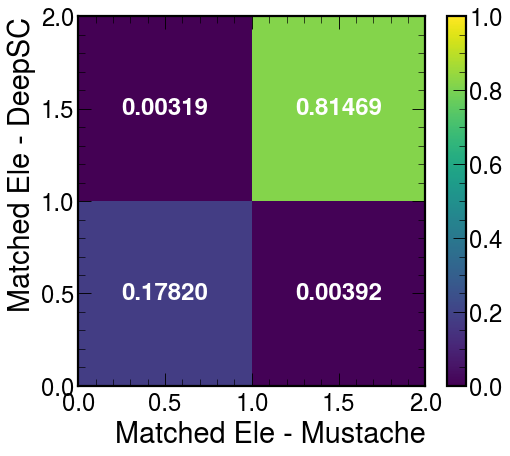

In [186]:
fig = plt.figure(figsize=(7,6))
ax = plt.gca()

hist, xbins, ybins = np.histogram2d(df_join.is_matched_ele_M, df_join.is_matched_ele_D,
                                     range=((0,2),(0,2)), bins=(2,2), density=True)

X, Y = np.meshgrid(xbins, ybins)
ax.pcolormesh(X,Y, hist.T, vmax=1, vmin=0)

for i in range(2):
    for j in range(2):
        ax.text(xbins[j]+0.5,ybins[i]+0.5, "{:.5f}".format(hist.T[i,j]), 
                color="w", ha="center", va="center", fontweight="bold", fontsize="small")

fig.colorbar(C,ax=ax)
ax.set_xlabel("Matched Ele - Mustache")
ax.set_ylabel("Matched Ele - DeepSC")

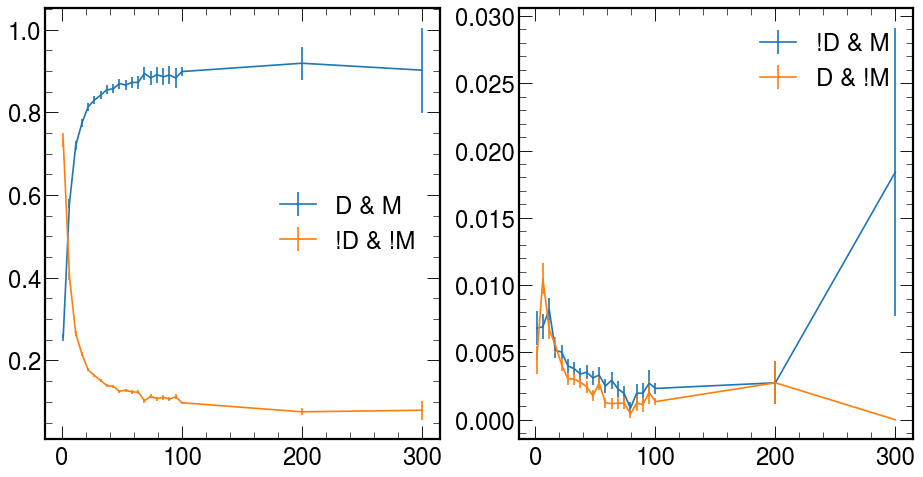

In [187]:
bins = np.concatenate([np.linspace(1, 100, 20), [200,300, 500]])

N_matched_both_pt, _ = np.histogram(df_join["genPart_pt_D"][(df_join.is_matched_ele_D==1)&(df_join.is_matched_ele_M==1)], 
               bins=bins )

N_matched_Donly_pt, _ = np.histogram(df_join["genPart_pt_D"][(df_join.is_matched_ele_D==1)&(df_join.is_matched_ele_M==0)], 
             bins=bins )

N_matched_Monly_pt, _= np.histogram(df_join["genPart_pt_M"][(df_join.is_matched_ele_D==0)&(df_join.is_matched_ele_M==1)], 
              bins=bins )

N_notmatched_pt, xbins = np.histogram(df_join["genPart_pt_D"][(df_join.is_matched_ele_D==0)&(df_join.is_matched_ele_M==0)], 
              bins=bins )

N_tot = N_matched_both_pt + N_matched_Donly_pt + N_matched_Monly_pt + N_notmatched_pt

fig, (ax,bx) = plt.subplots(1,2, figsize=(14,7))

err_both =  np.sqrt(  (1/N_tot)**2 * N_matched_both_pt + (N_matched_both_pt/N_tot**2)**2*N_tot)
err_notmatched =  np.sqrt(  (1/N_tot)**2 * N_notmatched_pt + (N_notmatched_pt/N_tot**2)**2*N_tot)
err_Donly =  np.sqrt(  (1/N_tot)**2 * N_matched_Donly_pt + (N_matched_Donly_pt/N_tot**2)**2*N_tot)
err_Monly =  np.sqrt(  (1/N_tot)**2 * N_matched_Monly_pt + (N_matched_Monly_pt/N_tot**2)**2*N_tot)

ax.errorbar(xbins[:-1], N_matched_both_pt/N_tot, err_both, label="D & M")
ax.errorbar(xbins[:-1], N_notmatched_pt/N_tot, err_notmatched, label="!D & !M")
bx.errorbar(xbins[:-1], N_matched_Monly_pt/N_tot,err_Monly, label="!D & M")
bx.errorbar(xbins[:-1], N_matched_Donly_pt/N_tot,err_Donly, label="D & !M")

ax.legend()
bx.legend()

/tmp/ipykernel_24813/2951237700.py:28: RuntimeWarning: invalid value encountered in divide
  c1 = ax1.pcolormesh(X,Y, (N_matched_both_pteta/N_tot).T, vmax=1, vmin=0)
/tmp/ipykernel_24813/2951237700.py:29: RuntimeWarning: invalid value encountered in divide
  c2 = ax2.pcolormesh(X,Y, (N_notmatched_pteta/N_tot).T,  norm=LogNorm())
/tmp/ipykernel_24813/2951237700.py:30: RuntimeWarning: invalid value encountered in divide
  c3 = ax3.pcolormesh(X,Y, (N_matched_Monly_pteta/N_tot).T,  norm=LogNorm(vmax=0.05, vmin=1e-4,))
/tmp/ipykernel_24813/2951237700.py:31: RuntimeWarning: invalid value encountered in divide
  c4 = ax4.pcolormesh(X,Y, (N_matched_Donly_pteta/N_tot).T, norm=LogNorm( vmax=0.05, vmin=1e-4,))


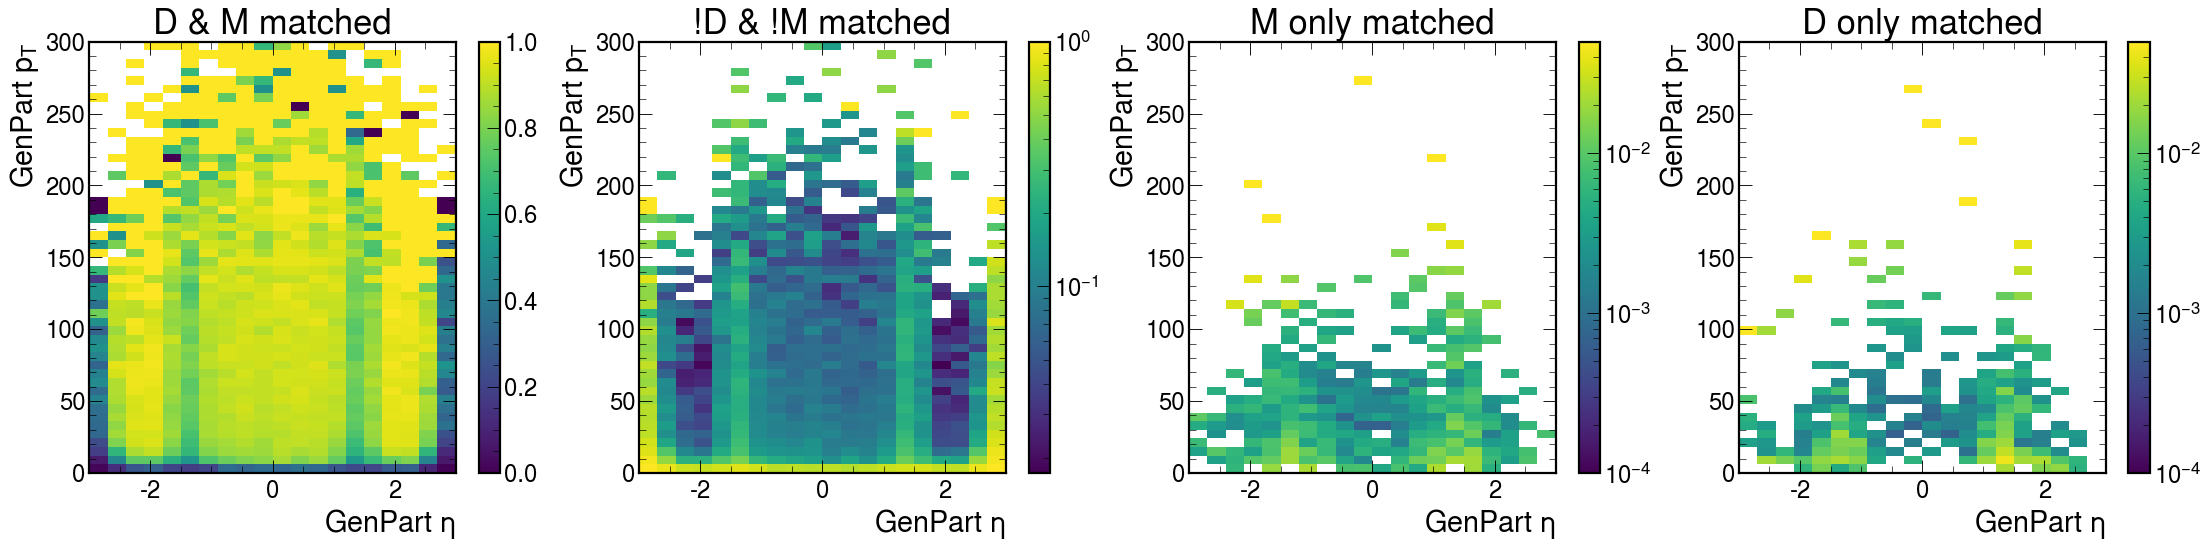

In [191]:
bins = (20, 50)
rrange = ((-3,3),(0,300))

N_matched_both_pteta, _, _ = np.histogram2d(df_join["genPart_eta_D"][(df_join.is_matched_ele_D==1)&(df_join.is_matched_ele_M==1)],
                                            df_join["genPart_pt_D"][(df_join.is_matched_ele_D==1)&(df_join.is_matched_ele_M==1)],
               bins=bins, range=rrange )

N_matched_Donly_pteta, _, _ = np.histogram2d(df_join["genPart_eta_D"][(df_join.is_matched_ele_D==1)&(df_join.is_matched_ele_M==0)],
                                             df_join["genPart_pt_D"][(df_join.is_matched_ele_D==1)&(df_join.is_matched_ele_M==0)],
            bins=bins, range=rrange  )

N_matched_Monly_pteta, _, _= np.histogram2d(df_join["genPart_eta_M"][(df_join.is_matched_ele_D==0)&(df_join.is_matched_ele_M==1)], 
                                            df_join["genPart_pt_M"][(df_join.is_matched_ele_D==0)&(df_join.is_matched_ele_M==1)], 
            bins=bins, range=rrange )

N_notmatched_pteta, xbins, ybins = np.histogram2d(df_join["genPart_eta_D"][(df_join.is_matched_ele_D==0)&(df_join.is_matched_ele_M==0)], 
                                                  df_join["genPart_pt_D"][(df_join.is_matched_ele_D==0)&(df_join.is_matched_ele_M==0)], 
             bins=bins, range=rrange )

N_tot = N_matched_both_pteta + N_matched_Donly_pteta + N_matched_Monly_pteta + N_notmatched_pteta


fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(34,7))

X, Y = np.meshgrid(xbins, ybins)


c1 = ax1.pcolormesh(X,Y, (N_matched_both_pteta/N_tot).T, vmax=1, vmin=0)
c2 = ax2.pcolormesh(X,Y, (N_notmatched_pteta/N_tot).T,  norm=LogNorm())
c3 = ax3.pcolormesh(X,Y, (N_matched_Monly_pteta/N_tot).T,  norm=LogNorm(vmax=0.05, vmin=1e-4,))
c4 = ax4.pcolormesh(X,Y, (N_matched_Donly_pteta/N_tot).T, norm=LogNorm( vmax=0.05, vmin=1e-4,))

ax1.set_xlabel("GenPart $\eta$")
ax2.set_xlabel("GenPart $\eta$")
ax3.set_xlabel("GenPart $\eta$")
ax4.set_xlabel("GenPart $\eta$")
ax1.set_ylabel("GenPart $p_T$")
ax2.set_ylabel("GenPart $p_T$")
ax3.set_ylabel("GenPart $p_T$")
ax4.set_ylabel("GenPart $p_T$")

ax1.set_title("D & M matched")
ax2.set_title("!D & !M matched")
ax3.set_title("M only matched")
ax4.set_title("D only matched")
plt.colorbar(c1, ax=ax1)
plt.colorbar(c2, ax=ax2)
plt.colorbar(c3, ax=ax3)
plt.colorbar(c4, ax=ax4)

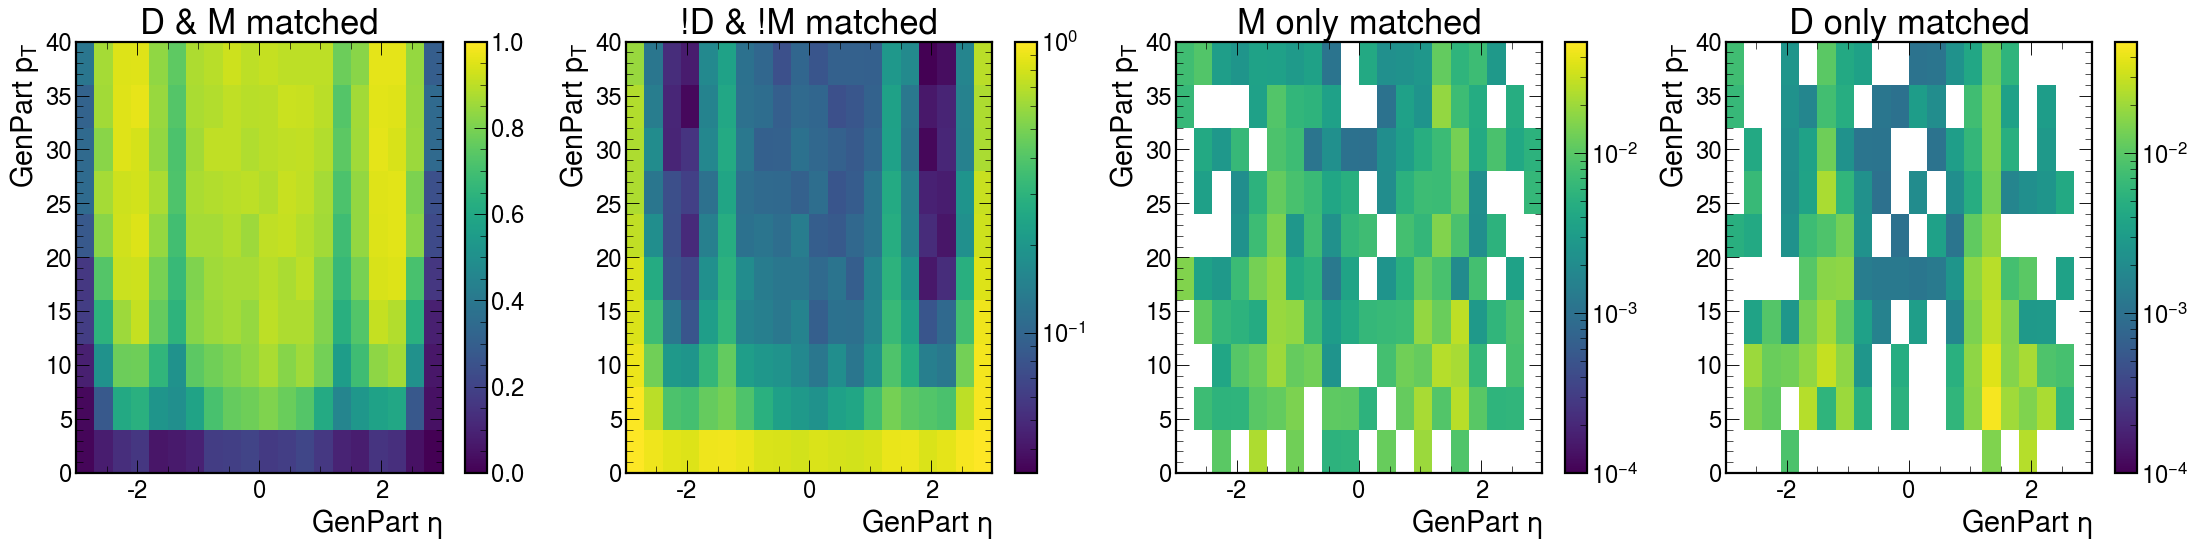

In [193]:
bins = (20, 10)
rrange = ((-3,3),(0,40))

N_matched_both_pteta, _, _ = np.histogram2d(df_join["genPart_eta_D"][(df_join.is_matched_ele_D==1)&(df_join.is_matched_ele_M==1)],
                                            df_join["genPart_pt_D"][(df_join.is_matched_ele_D==1)&(df_join.is_matched_ele_M==1)],
               bins=bins, range=rrange )

N_matched_Donly_pteta, _, _ = np.histogram2d(df_join["genPart_eta_D"][(df_join.is_matched_ele_D==1)&(df_join.is_matched_ele_M==0)],
                                             df_join["genPart_pt_D"][(df_join.is_matched_ele_D==1)&(df_join.is_matched_ele_M==0)],
            bins=bins, range=rrange  )

N_matched_Monly_pteta, _, _= np.histogram2d(df_join["genPart_eta_M"][(df_join.is_matched_ele_D==0)&(df_join.is_matched_ele_M==1)], 
                                            df_join["genPart_pt_M"][(df_join.is_matched_ele_D==0)&(df_join.is_matched_ele_M==1)], 
            bins=bins, range=rrange )

N_notmatched_pteta, xbins, ybins = np.histogram2d(df_join["genPart_eta_D"][(df_join.is_matched_ele_D==0)&(df_join.is_matched_ele_M==0)], 
                                                  df_join["genPart_pt_D"][(df_join.is_matched_ele_D==0)&(df_join.is_matched_ele_M==0)], 
             bins=bins, range=rrange )

N_tot = N_matched_both_pteta + N_matched_Donly_pteta + N_matched_Monly_pteta + N_notmatched_pteta


fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(34,7))

X, Y = np.meshgrid(xbins, ybins)


c1 = ax1.pcolormesh(X,Y, (N_matched_both_pteta/N_tot).T, vmax=1, vmin=0)
c2 = ax2.pcolormesh(X,Y, (N_notmatched_pteta/N_tot).T,  norm=LogNorm())
c3 = ax3.pcolormesh(X,Y, (N_matched_Monly_pteta/N_tot).T,  norm=LogNorm(vmax=0.05, vmin=1e-4,))
c4 = ax4.pcolormesh(X,Y, (N_matched_Donly_pteta/N_tot).T, norm=LogNorm( vmax=0.05, vmin=1e-4,))

ax1.set_xlabel("GenPart $\eta$")
ax2.set_xlabel("GenPart $\eta$")
ax3.set_xlabel("GenPart $\eta$")
ax4.set_xlabel("GenPart $\eta$")
ax1.set_ylabel("GenPart $p_T$")
ax2.set_ylabel("GenPart $p_T$")
ax3.set_ylabel("GenPart $p_T$")
ax4.set_ylabel("GenPart $p_T$")

ax1.set_title("D & M matched")
ax2.set_title("!D & !M matched")
ax3.set_title("M only matched")
ax4.set_title("D only matched")
plt.colorbar(c1, ax=ax1)
plt.colorbar(c2, ax=ax2)
plt.colorbar(c3, ax=ax3)
plt.colorbar(c4, ax=ax4)